In [1]:
# Setup to analyse an MDP Playground experiment
from mdp_playground.analysis import MDPP_Analysis
# Set dir_name to the location where the CSV files from running an experiment were saved
dir_name = '../mdp_files/'
# Set exp_name to the name that was given to the experiment when running it
exp_name = 'dqn_seq_del'
# Set the following to True to save PDFs of plots that you generate below
save_fig = True

In [ ]:
# Data loading
save_folder = "../mdp_files/plots/"
mdpp_analysis = MDPP_Analysis(save_folder)
train_stats, eval_stats, train_curves, eval_curves, train_aucs, eval_aucs = mdpp_analysis.load_data(dir_name, exp_name, load_eval=True)

In [ ]:
# 1-D: Plots showing reward after 20k timesteps when varying a single meta-feature
# Plots across 10 runs: Training: with std dev across the runs
mdpp_analysis.plot_1d_dimensions(train_stats, save_fig)
mdpp_analysis.plot_1d_dimensions(train_aucs, save_fig)

In [ ]:
# Plots across 10 runs: Evaluation: with std dev across the runs
mdpp_analysis.plot_1d_dimensions(eval_stats, save_fig, train=False)
mdpp_analysis.plot_1d_dimensions(eval_aucs, save_fig, train=False)

In [ ]:
# This and the next cell do the same as the previous 2 cells but plot episode mean lengths instead of episode reward
mdpp_analysis.plot_1d_dimensions(train_stats, save_fig, metric_num=-1)

In [ ]:
mdpp_analysis.plot_1d_dimensions(eval_stats, save_fig, train=False, metric_num=-1)

In [ ]:
# 2-D heatmap plots across 10 runs: Training runs: with std dev across the runs
# There seems to be a bug with matplotlib - x and y axes tick labels are not correctly set even though we pass them. Please feel free to look into the code and suggest a correction if you find it.
mdpp_analysis.plot_2d_heatmap(train_stats, save_fig)

In [ ]:
# 2-D heatmap plots across 10 runs: Evaluation runs: with std dev across the runs
mdpp_analysis.plot_2d_heatmap(eval_stats, save_fig, train=False)

In [ ]:
# Plot learning curves: Training: Each curve corresponds to a different seed for the agent
mdpp_analysis.plot_learning_curves(train_curves, save_fig)

In [ ]:
# Plot learning curves: Evaluation: Each curve corresponds to a different seed for the agent
mdpp_analysis.plot_learning_curves(eval_curves, save_fig, train=False)

In [2]:
# Setup to analyse an MDP Playground experiment
from mdp_playground.analysis import MDPP_Analysis
# Set dir_name to the location where the CSV files from running an experiment were saved
dir_name = '../mdp_files/'
# Set exp_name to the name that was given to the experiment when running it
exp_name = 'dqn_seq_del'
# Set the following to True to save PDFs of plots that you generate below
save_fig = True

from cave.cavefacade import CAVE
from mdp_playground.analysis.mdpp_to_cave import MDPPToCave
import os

#The converted mdpp csvs will be stored in output_dir
output_dir = "../mdpp_to_cave"
mdpp_cave = MDPPToCave(output_dir)
cave_input_file = mdpp_cave.to_bohb_results(dir_name, exp_name)

cave_input_file = "../mdpp_to_cave/%s"%exp_name

# Similarly, as an example, cave will ouput it's results 
# to the same directory as cave's input files

cave_results = os.path.join(cave_input_file, "out")
cave = CAVE(folders = [cave_input_file],
            output_dir = cave_results,
            ta_exec_dir = [cave_input_file],
            file_format = "BOHB",
            show_jupyter=True,
           )


/home/jessica/anaconda3/envs/py36_toy_rl/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Loading data from a sequential run/already combined runs of experiment configurations.


In [ ]:
cave.compare_default_incumbent()

In [ ]:
cave.performance_table()

<IPython.core.display.Javascript object>


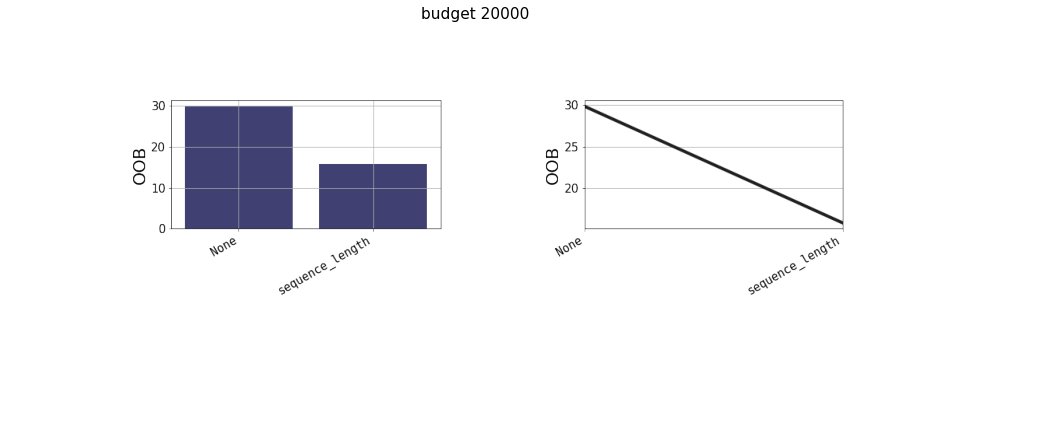

<IPython.core.display.Javascript object>


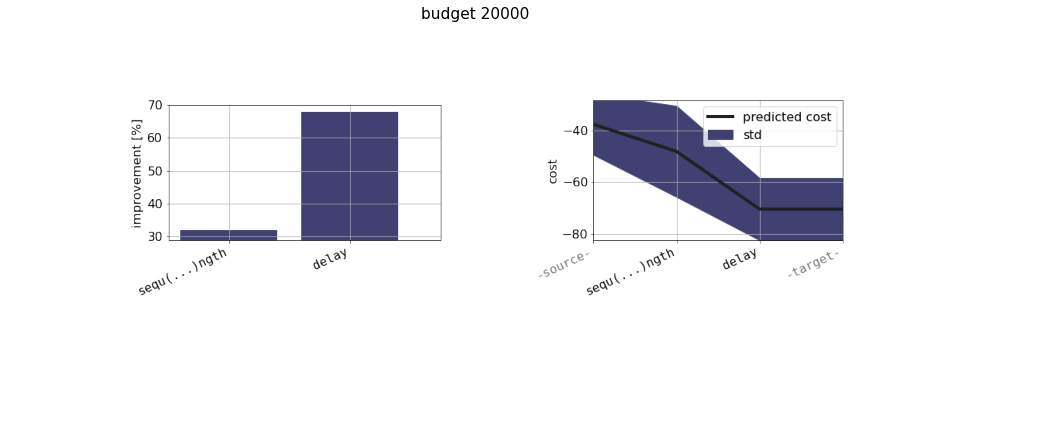

In [3]:
cave.pimp_forward_selection()
cave.cave_ablation()

In [ ]:
cave.pimp_comparison_table()

-------------------- Single importance: --------------------,--------------------
sequence_length,71.3694 +/- 21.4898
delay,11.5613 +/- 9.2271
-------------------- Pairwise importance: --------------------,--------------------
sequence_length & delay,17.0694 +/- 14.6953


<IPython.core.display.Javascript object>


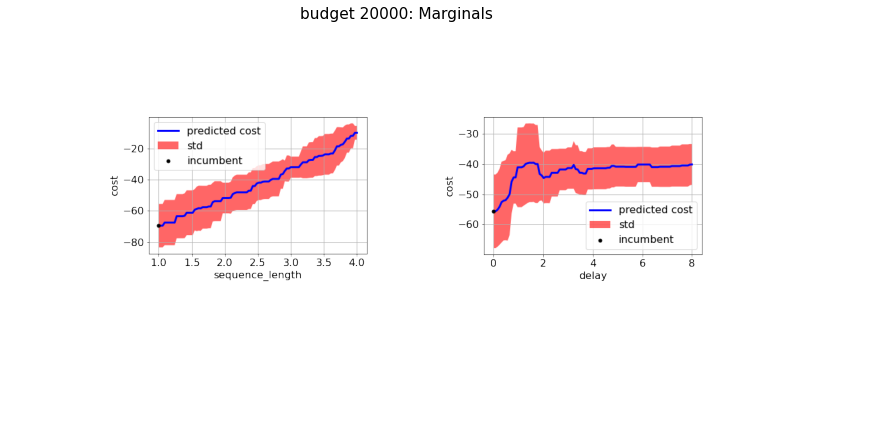

<IPython.core.display.Javascript object>


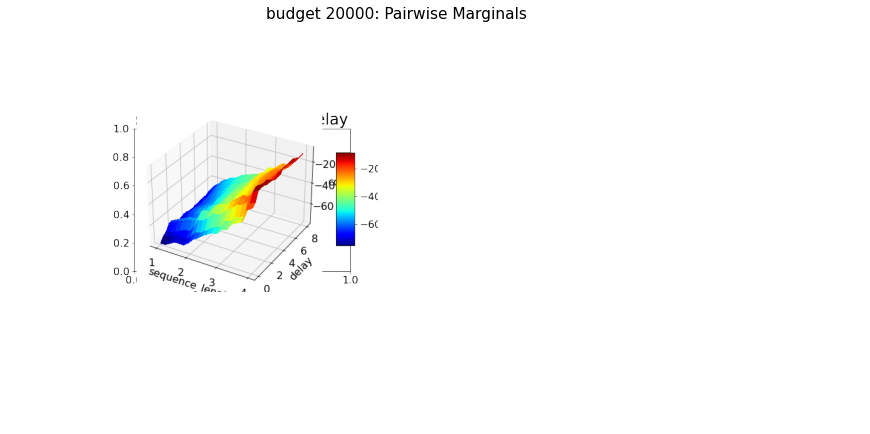

In [5]:
cave.cave_fanova()

/home/jessica/anaconda3/envs/py36_toy_rl/lib/python3.6/site-packages/pimp/evaluator/local_parameter_importance.py:402: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim([min_y * 0.95, max_y])
/home/jessica/anaconda3/envs/py36_toy_rl/lib/python3.6/site-packages/pimp/evaluator/local_parameter_importance.py:402: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim([min_y * 0.95, max_y])


<IPython.core.display.Javascript object>


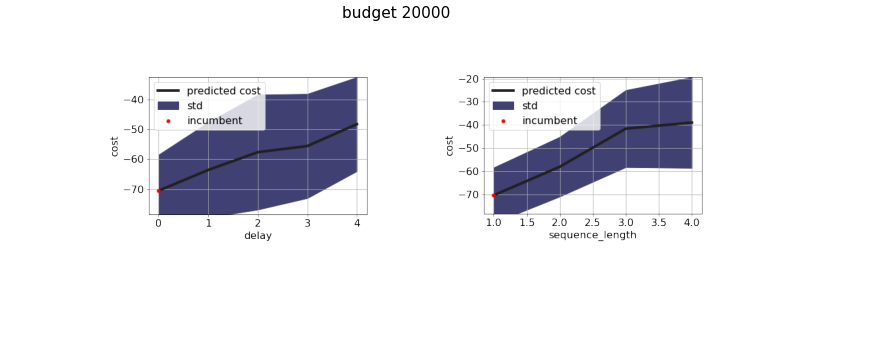

In [4]:
cave.local_parameter_importance()

In [ ]:
import matplotlib.pyplot as plt
frc = [-1] + mdpp_analysis.final_rows_for_a_config
print(len(frc), frc, type(train_curves))
j = 20
for i in range(5):
    plt.plot(train_curves[frc[j+i]+1:frc[j+i+1], -2])
plt.ylim([200, 250])
plt.grid()

In [ ]:
print(train_aucs)

In [ ]:
stats_data = train_stats
metric_num = -2
import numpy as np
import matplotlib.pyplot as plt
mean_data_ = np.mean(stats_data[..., metric_num], axis=-1) # the slice sub-selects the metric written in position metric_num from the "last axis of diff. metrics that were written" and then the axis of #seeds becomes axis=-1 ( before slice it was -2).
to_plot_ = np.squeeze(mean_data_)
std_dev_ = np.std(stats_data[..., metric_num], axis=-1) #seed
to_plot_std_ = np.squeeze(std_dev_)

#fig_width = len(self.tick_labels[0])
fig_width = 5
# plt.figure()
plt.figure(figsize=(fig_width, 1.5))

print(to_plot_.shape)
plt.bar([i for i in range(to_plot_.shape[0])], to_plot_, yerr=to_plot_std_)
plt.ylim([-5, 0])
plt.grid()
# plt.bar(self.tick_labels[0], to_plot_[:, 0], yerr=to_plot_std_[:, 0])

In [ ]:
print(train_stats.shape, eval_stats.shape, train_curves.shape, eval_curves.shape)
print(train_stats[:,0:4,:,:])
ts_copy = train_stats.copy()
ts_copy[:,1:,:,:] = train_stats[:,:-1,:,:]
ts_copy[:,0,:,:] = train_stats[:,4,:,:]

tc_copy = train_curves.copy()
tc_copy[14955:,:] = train_curves[:-14955,:]
tc_copy[:14955,:] = train_curves[-14955:,:]
# 14955
# mdpp_analysis.tick_labels[0][1:5], mdpp_analysis.tick_labels[0][0] = mdpp_analysis.tick_labels[0][0:4], mdpp_analysis.tick_labels[0][4]
# mdpp_analysis.dims_values[1][1:5], mdpp_analysis.dims_values[1][0] = mdpp_analysis.dims_values[1][0:4], mdpp_analysis.dims_values[1][4]
print(ts_copy)
print(dir(mdpp_analysis))
print(mdpp_analysis.metric_names, mdpp_analysis.tick_labels)
print(mdpp_analysis.dims_values[1], mdpp_analysis.config_names, mdpp_analysis.dims_varied)
print(train_curves[1,:])

In [ ]:
# some more analysis (for tune HPs)
import os
import sys
import numpy as np
from scipy.stats import spearmanr as spm
from scipy.stats import pearsonr as prs
import matplotlib.pyplot as plt

dir_name_config = 'experiments/'
file_ = dir_name_config + exp_name

config_file_path = os.path.abspath('/'.join(file_.split('/')[:-1]))
# print(file_.split('/')[:-1])
print("config_file_path:", config_file_path)
sys.path.insert(1, config_file_path) #hack
import importlib
config = importlib.import_module(file_.split('/')[-1], package=None)
print("Number of seeds for environment:", config.num_seeds)

value_tuples = []
for config_type, config_dict in config.var_configs.items():
    for key in config_dict:
        if 'seed' in key:
            print("Found seed axis:", key)
            pass
        else:
            assert type(config.var_configs[config_type][key]) == list, "var_config should be a dict of dicts with lists as the leaf values to allow each configuration option to take multiple possible values"
            value_tuples.append(config.var_configs[config_type][key])
print("value_tuples", value_tuples)

import itertools
cartesian_product_configs = list(itertools.product(*value_tuples))
print("Total number of configs. to run:", len(cartesian_product_configs))
print("Varying dims in mdpp_analysis.axis_labels (will have dummy_seed in there as 1st dim and may not show actual last varying dim because mdpp_analysis assumes last varying dim is seed (and ignores last config_name) and here seed is always the 1st dim):", mdpp_analysis.axis_labels)
# import itertools
# cartesian_product_configs = list(itertools.product(*config_vals))
for i in range(len(train_stats.shape)):
    if train_stats.shape[i] > 1:
        dummy_seeds_axis = i
        break
print("dummy_seeds_axis, train_stats.shape:", dummy_seeds_axis, len(train_stats.shape))

# dummy_seeds_axis = -1

def analysis(train_stats):
    mean_data_ = np.mean(train_stats[..., -2], axis=dummy_seeds_axis)
    std_data_ = np.std(train_stats[..., -2], axis=dummy_seeds_axis)
    print("Mean shape (after slice), Sliced shape:", mean_data_.shape, train_stats[..., -2].shape)
    flattened_mean = np.ravel(mean_data_)
    flattened_std = np.ravel(std_data_)
    ranks = np.argsort(flattened_mean)[::-1]
    print('sort of indices:\n', ranks)
    ranks_with_std = np.argsort(flattened_mean - flattened_std)[::-1]
    print('sort of indices (with std taken into account):\n', ranks_with_std)
    sorted_vals = np.sort(flattened_mean)[::-1]
    print('sort of values:\n', sorted_vals)
    sorted_vals_with_std = np.sort(flattened_mean - flattened_std)[::-1]
    print('sort of values (with std taken into account):\n', sorted_vals_with_std)
    print("TOP 3 configs (with std taken into account):")
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[-1]]) 
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[-2]])
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[-3]])
    print("\nBOTTOM 3 configs (with std taken into account):")
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[0]]) 
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[1]])
    print(cartesian_product_configs[np.argsort(flattened_mean - flattened_std)[2]])
    plt.figure(figsize=(30, 1.5))
    plt.bar([i for i in range(len(flattened_mean))], flattened_mean, yerr=flattened_std)
    plt.show()
    return flattened_mean, flattened_mean - flattened_std

sorted_vals_t, sorted_vals_with_std_t = analysis(train_stats)
sorted_vals_e, sorted_vals_with_std_e = analysis(eval_stats)
print(spm(sorted_vals_t, sorted_vals_e))
print(spm(sorted_vals_t, sorted_vals_with_std_t))
print(spm(sorted_vals_with_std_t, sorted_vals_with_std_e))
print(spm(sorted_vals_e, sorted_vals_with_std_e))


In [ ]:
print(config.var_configs)
print(train_stats.shape)

In [ ]:
mdpp_analysis.config_names, mdpp_analysis.config_counts

In [ ]:
import numpy as np
print(np.mean(train_stats, axis=2))
print(np.mean(train_aucs, axis=2))
from scipy import stats
print(stats.spearmanr([4,3,2,1,0], [4,3,2,1,0]))
print(np.mean(eval_stats, axis=2))
print(np.mean(eval_aucs, axis=2))
print(train_stats)
print(eval_stats)
